In [ ]:
#Machine learning
import pandas as pd

url = '50_Startups.csv'
data = pd.read_csv(url)

In [ ]:
data.drop('State', axis = 'columns')

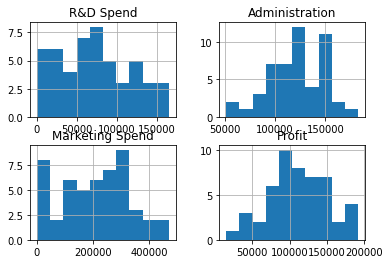

In [ ]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<AxesSubplot:>

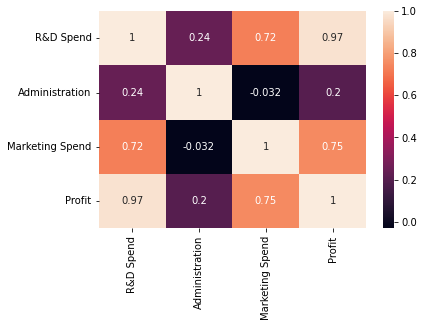

In [ ]:
import seaborn as sns
sns.heatmap(correlation, annot = True)

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

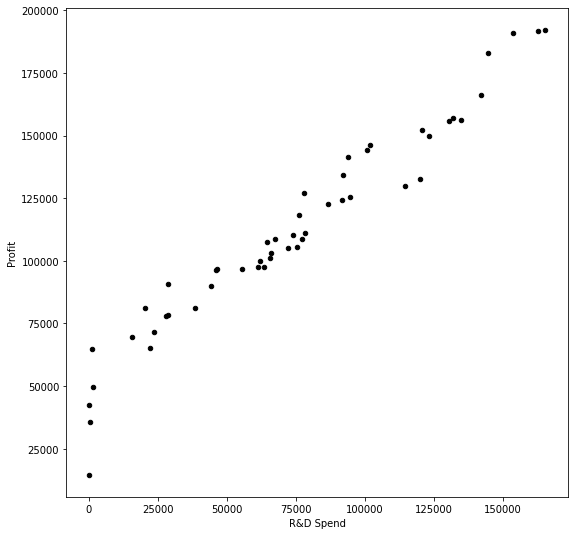

In [ ]:
data.plot(kind = 'scatter', x = 'R&D Spend', y = 'Profit',figsize = (9,9), color = 'black')

In [ ]:
#Mo hinh bac 3
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame([data['R&D Spend'],data['R&D Spend']**2,data['R&D Spend']**3]).T, y = data['Profit'])
print(model.intercept_)# y = ax + b --> b = intercept
print(model.coef_)#y = ax + b --> a = cof
model.score(X = pd.DataFrame([data['R&D Spend'],data['R&D Spend']**2,data['R&D Spend']**3]).T, y = data['Profit'])*100 #Accuracy

43108.76756818297
[ 1.40072682e+00 -8.82403324e-06  3.64774030e-11]


95.40709421464032

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


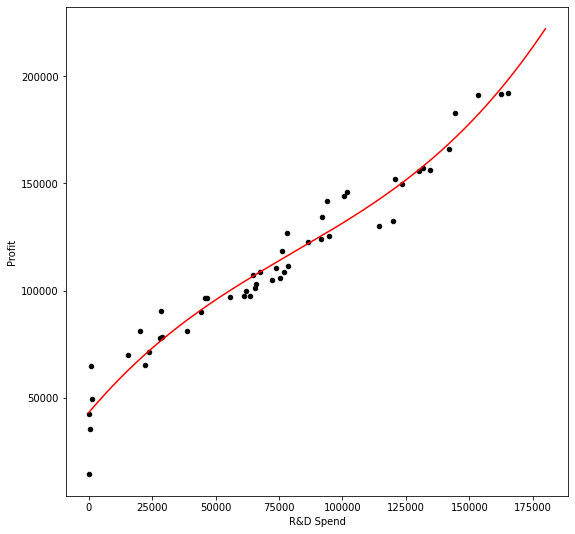

In [ ]:
import numpy as np
range = np.arange(0,180000,10)
predictor = pd.DataFrame([range, range**2,range**3]).T
y_pred = model.predict(X = predictor)
data.plot(kind = 'scatter', x = 'R&D Spend', y = 'Profit', figsize = (9,9), color = 'black')
plt.plot(range, y_pred, color = 'red')